## ICE-8 Image Filtering

## (Tutorial) Convolutional filter
Please review the following article for further understanding of Convolutional layer in Convolutional Neural Network
https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/ <br>
Please download the image from the following link for the your program <br>
https://drive.google.com/file/d/1MSQ8e0nxoBIkcp5sdo8Vd-65b9okx6hX/view?usp=sharing

* use pip install opencv-python to install cv2

## Example. Convolutional filter

In [1]:
#Google Drive Connectivity 

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
ColabPath="/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 8/"

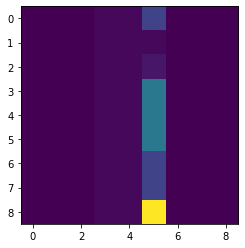

[[  0   0   0   5   0  77   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0 134   0   0   0]
 [  0   0   0   3   0 117   0   0   0]
 [  0   0   0   3   0 127   0   0   0]
 [  0   0   0   3   0  47   0   0   0]
 [  0   0   0   3   0  17   0   0   0]
 [  0   0   0   5   0 255   0   0   0]]


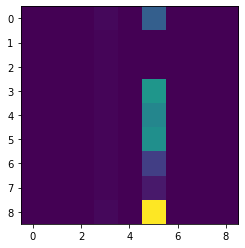

In [3]:
import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np

# build the test data
data = np.array([[0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 50, 0, 0, 0]], dtype='uint8')   
plt.imshow(data)
pylab.show()

#build the convolutional kernel
fil = np.array([[ -1, -1, -1],                        
                [ -1, 8, -1],
                [ -1, -1, -1]])
#use filter2D to apply convolution
res = cv2.filter2D(data,-1,fil, borderType=cv2.BORDER_CONSTANT)   
print(res)

plt.imshow(res)
pylab.show()

## Task 1. Building three different kernels for different purposes, and commenting the purpose of each kernel
For instance, the kernel in the example is using for edge extraction

In [116]:
#Emboss filter
fil2 = np.array([[-2, -1, 0],
                 [-1, 1, 1],
                 [0, 1, 2]])

#Laplacian filter
fil3 = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]])

#sharpen filter
fil4 = np.array([[0, -1, 0],
                 [-1, 5, -1],
                 [0, -1, 0]])

#use filter2D to apply convolution
def filter(data,filter_data):
  result=cv2.filter2D(data,-1,filter_data, borderType=cv2.BORDER_CONSTANT)  
  print(result)
  plt.imshow(result)
  pylab.show()
  return result

from tensorflow.keras.layers import Conv3D
def filter_3d(data,filter_data):
  result=Conv3D(data,-1,filter_data)  
  print(result)
  plt.imshow(result)
  pylab.show()
  return result

def filter_gray(data,filter_data,txt):
  result=cv2.filter2D(data,-1,filter_data, borderType=cv2.BORDER_CONSTANT)  
  print(result)
  plt.title(txt)
  plt.imshow(result,cmap=plt.cm.gray)
  pylab.show()
  return result
  

[[  0   0   3   5  13  10   0   0   0]
 [  0   0   3   4   5   0   0   0   0]
 [  0   0   3   4  41  19   0   0   0]
 [  0   0   3   4  58  34   0   0   0]
 [  0   0   3   4  58  17   0   0   0]
 [  0   0   3   4  38   7   0   0   0]
 [  0   0   3   4  28   0   0   0   0]
 [  0   0   3   4 108  47   0   0   0]
 [  0   0   1   1  47  37   0   0   0]]


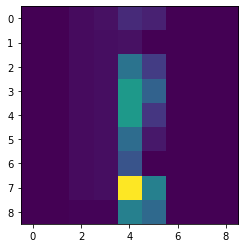

[[  0   0   0   5   0  77   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0 134   0   0   0]
 [  0   0   0   3   0 117   0   0   0]
 [  0   0   0   3   0 127   0   0   0]
 [  0   0   0   3   0  47   0   0   0]
 [  0   0   0   3   0  17   0   0   0]
 [  0   0   0   5   0 255   0   0   0]]


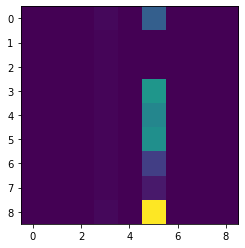

[[  0   0   0   3   0  48   0   0   0]
 [  0   0   0   2   1   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   0   0   2   0  76   0   0   0]
 [  0   0   0   2   0  59   0   0   0]
 [  0   0   0   2   0  69   0   0   0]
 [  0   0   0   2   0  19   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   0   0   3   0 239   0   0   0]]


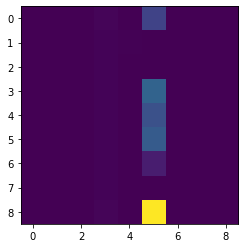

In [73]:
r2=filter(data,fil2)
r3=filter(data,fil3)
r4=filter(data,fil4)

## Task 2. Refer to the multiple channels section in the tutorial material, apply the three kernels you built in task 1 to the downloaded image. Visualize the feature maps produced by the three kernels. Combine the three feature maps to a 3-channels feature map and visualize it.

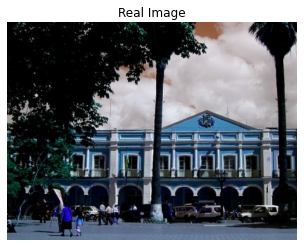

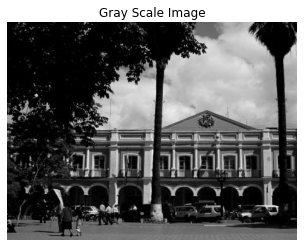

In [79]:
# write your code here
from skimage import color

img=cv2.imread(ColabPath+'1.jpg')
imgGray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.figure()
plt.axis("off")
plt.title("Real Image")
plt.imshow(img)
#plt.imshow(imgGray,cmap=plt.cm.gray)
pylab.show()
plt.axis("off")
plt.title("Gray Scale Image")
plt.imshow(imgGray,cmap=plt.cm.gray)
pylab.show()

[[  5   1   0 ...  48 134  74]
 [  4   0   0 ...   0  19   0]
 [  4   0   0 ...   0   0   0]
 ...
 [255 118 122 ...  79  73   0]
 [255 113 115 ... 122 111   0]
 [107   0   0 ...   0   0   0]]


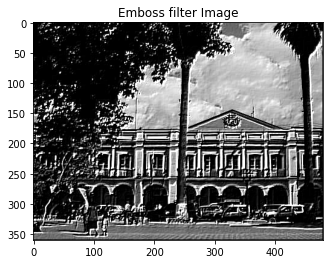

[[  5   5   0 ...  50   0 255]
 [  3   3   0 ...  19   0 185]
 [  3   3   0 ...  25   0  59]
 ...
 [255   0   4 ...  37  50 255]
 [255   5   1 ...   0   0 219]
 [255 255 255 ... 255 255 255]]


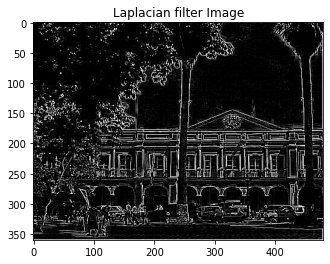

[[  3   3   0 ...  30   0 220]
 [  2   2   0 ...  19   0  98]
 [  2   2   0 ...  21   0  28]
 ...
 [210 104 108 ... 125 131 247]
 [216 109 107 ...  68  67 159]
 [255 214 213 ... 255 255 255]]


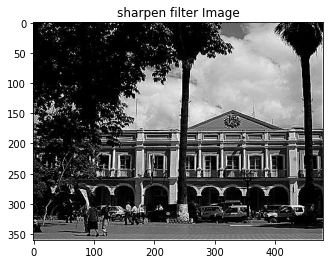

In [83]:
#use filter2D to apply convolution
r2=filter_gray(imgGray,fil2,"Emboss filter Image")
r3=filter_gray(imgGray,fil3,"Laplacian filter Image")
r4=filter_gray(imgGray,fil4,"sharpen filter Image")

In [88]:
np.shape(r2)

(360, 480)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


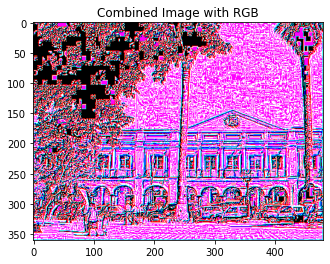

In [98]:
r_combined=np.empty([360,480,3],dtype=float)
r_combined[:,:,0]=r2
r_combined[:,:,1]=r3
r_combined[:,:,2]=r4

plt.imshow(r_combined)
plt.title("Combined Image with RGB")
pylab.show()


## Task 3. Refer to the multiple layers section in the tutorial material, repeatly apply the three kernels to the combined feature map that created by the previous round two times. Visualize the feature maps produced in the process

In [142]:
def layer(src,kernel):
  data = cv2.filter2D(src=src, ddepth=-3, kernel = kernel)
  data1 = cv2.filter2D(src=src, ddepth=-3, kernel = kernel)
  plt.imshow(data1)
  plt.title("Combined Image with filter applied")
  pylab.show()
  return 
 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


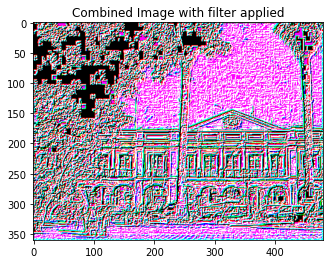

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


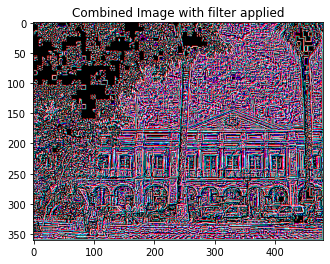

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


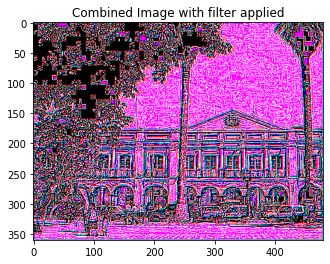

In [143]:
layer(r_combined,fil2)
layer(r_combined,fil3)
layer(r_combined,fil4)